In [7]:
import cv2
import sys
import time
import math
import numpy as np
import random as rng
from scipy import stats
import kociemba
from datetime import datetime


In [8]:
def concat(up_face,right_face,front_face,down_face,left_face,back_face):
    # solution = [up_face,right_face,front_face,down_face,left_face,back_face]
    solution = np.concatenate((up_face, right_face), axis=None)
    solution = np.concatenate((solution, front_face), axis=None)
    solution = np.concatenate((solution, down_face), axis=None)
    solution = np.concatenate((solution, left_face), axis=None)
    solution = np.concatenate((solution, back_face), axis=None)
    # print(solution)
    return solution

In [9]:
a = np.array([[1,2],[3,4],[5,6]])

In [10]:
print(a.shape)

(3, 2)


In [12]:
concat(a,a,a,a,a,a)

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6])

In [13]:
print(concat(a,a,a,a,a,a).shape)

(36,)


In [14]:
pwd

'/home/lipi/Rubics-Cube-Solver/v0'

In [16]:
from PIL import Image
im=Image.open('../../a.jpg')

In [17]:
im.show()

In [18]:
im1=cv2.imread('../../a.jpg')

In [19]:
im1.shape

(1280, 720, 3)

In [23]:
print(im1)

[[[242 232 198]
  [243 233 199]
  [243 233 199]
  ...
  [240 209 216]
  [240 209 216]
  [240 209 216]]

 [[242 232 198]
  [243 233 199]
  [243 233 199]
  ...
  [240 209 216]
  [240 209 216]
  [240 209 216]]

 [[242 232 198]
  [243 233 199]
  [243 233 199]
  ...
  [240 209 216]
  [240 209 216]
  [239 208 215]]

 ...

 [[249 236 204]
  [244 233 201]
  [242 232 198]
  ...
  [248 227 195]
  [247 227 192]
  [246 226 191]]

 [[248 233 200]
  [243 231 197]
  [241 229 195]
  ...
  [248 227 195]
  [247 227 192]
  [246 227 190]]

 [[244 229 196]
  [241 226 193]
  [238 226 192]
  ...
  [248 228 193]
  [248 228 193]
  [247 228 191]]]


In [24]:
def detect_face(bgr_image_input):

    gray = cv2.cvtColor(bgr_image_input,cv2.COLOR_BGR2GRAY)

    cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

    gray = cv2.adaptiveThreshold(gray,20,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,0)
    #cv2.imwrite()
    try:
         _, contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
    except:
         contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)


    i = 0
    contour_id = 0
    #print(len(contours))
    count = 0
    blob_colors = []
    for contour in contours:
        A1 = cv2.contourArea(contour)
        contour_id = contour_id + 1

        if A1 < 3000 and A1 > 1000:
            perimeter = cv2.arcLength(contour, True)
            epsilon = 0.01 * perimeter
            approx = cv2.approxPolyDP(contour, epsilon, True)
            hull = cv2.convexHull(contour)
            if cv2.norm(((perimeter / 4) * (perimeter / 4)) - A1) < 150:
                #if cv2.ma
                count = count + 1
                x, y, w, h = cv2.boundingRect(contour)
                #cv2.rectangle(bgr_image_input, (x, y), (x + w, y + h), (0, 255, 255), 2)
                #cv2.imshow('cutted contour', bgr_image_input[y:y + h, x:x + w])
                val = (50*y) + (10*x)
                blob_color = np.array(cv2.mean(bgr_image_input[y:y+h,x:x+w])).astype(int)
                cv2.drawContours(bgr_image_input,[contour],0,(255, 255, 0),2)
                cv2.drawContours(bgr_image_input, [approx], 0, (255, 255, 0), 2)
                blob_color = np.append(blob_color, val)
                blob_color = np.append(blob_color, x)
                blob_color = np.append(blob_color, y)
                blob_color = np.append(blob_color, w)
                blob_color = np.append(blob_color, h)
                blob_colors.append(blob_color)
    if len(blob_colors) > 0:
        blob_colors = np.asarray(blob_colors)
        blob_colors = blob_colors[blob_colors[:, 4].argsort()]
    face = np.array([0,0,0,0,0,0,0,0,0])
    if len(blob_colors) == 9:
        #print(blob_colors)
        for i in range(9):
            #print(blob_colors[i])
            if blob_colors[i][0] > 120 and blob_colors[i][1] > 120 and blob_colors[i][2] > 100:
                blob_colors[i][3] = 1
                face[i] = 1
            elif blob_colors[i][0] < 100 and blob_colors[i][1] > 120 and blob_colors[i][2] > 120 and np.abs(blob_colors[i][1]-blob_colors[i][2])<30:
                blob_colors[i][3] = 2
                face[i] = 2
            elif blob_colors[i][0] > blob_colors[i][1] and blob_colors[i][1] > blob_colors[i][2]:
                blob_colors[i][3] = 3
                face[i] = 3
            elif blob_colors[i][1] > blob_colors[i][0] and blob_colors[i][1] > blob_colors[i][2] and np.abs(blob_colors[i][0] - blob_colors[i][2]) < 30:
                blob_colors[i][3] = 4
                face[i] = 4
            elif blob_colors[i][2] > blob_colors[i][0] and blob_colors[i][2] > blob_colors[i][1] and np.abs(blob_colors[i][0] - blob_colors[i][1]) < 30 and blob_colors[i][0] < 80:
                blob_colors[i][3] = 5
                face[i] = 5
            elif blob_colors[i][1] < blob_colors[i][2] and blob_colors[i][0] < blob_colors[i][1] and blob_colors[i][2] > 120:
                blob_colors[i][3] = 6
                face[i] = 6
        #print(face)
        if np.count_nonzero(face) == 9:
            #print(face)
            #print (blob_colors)
            return face, blob_colors
        else:
            return [0,0], blob_colors
    else:
        return [0,0,0], blob_colors
        #break

In [25]:
im1=cv2.imread('../../a.jpg')

In [26]:
im1.shape

(1280, 720, 3)

In [27]:
print(im1)

[[[242 232 198]
  [243 233 199]
  [243 233 199]
  ...
  [240 209 216]
  [240 209 216]
  [240 209 216]]

 [[242 232 198]
  [243 233 199]
  [243 233 199]
  ...
  [240 209 216]
  [240 209 216]
  [240 209 216]]

 [[242 232 198]
  [243 233 199]
  [243 233 199]
  ...
  [240 209 216]
  [240 209 216]
  [239 208 215]]

 ...

 [[249 236 204]
  [244 233 201]
  [242 232 198]
  ...
  [248 227 195]
  [247 227 192]
  [246 226 191]]

 [[248 233 200]
  [243 231 197]
  [241 229 195]
  ...
  [248 227 195]
  [247 227 192]
  [246 227 190]]

 [[244 229 196]
  [241 226 193]
  [238 226 192]
  ...
  [248 228 193]
  [248 228 193]
  [247 228 191]]]


In [29]:
gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(1280, 720)

In [31]:
print(gray)

[[223 224 224 ... 215 215 215]
 [223 224 224 ... 215 215 215]
 [223 224 224 ... 215 215 214]
 ...
 [228 225 223 ... 220 219 218]
 [225 222 220 ... 220 219 218]
 [221 218 217 ... 220 220 219]]


In [32]:
from matplotlib import cm

In [33]:
im2= Image.fromarray(gray)

In [35]:
im2.show()

In [38]:
im1=cv2.imread('../../4.jpg')

In [40]:
im2= Image.fromarray(im1)

In [40]:
im2.show()

243

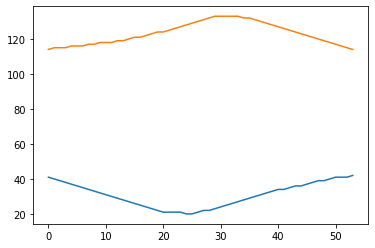

In [137]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

im1=cv2.imread('../../7.jpg')
gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
gray = cv2.morphologyEx(gray, cv2.MORPH_DILATE, kernel)
gray = cv2.adaptiveThreshold(gray,20,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,0)
try:
    _, contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
except:
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
plt.plot(contours[10].reshape(54,2))
len(contours)

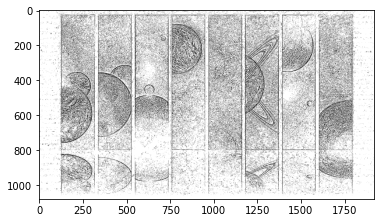

In [112]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

im1=cv2.imread('../../4.jpg')
plt.imshow(im1,cmap='gray')

gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
plt.imshow(gray,cmap='gray')

gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
plt.imshow(gray,cmap='gray')

gray = cv2.adaptiveThreshold(gray,20,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,0)
plt.imshow(gray,cmap='gray')


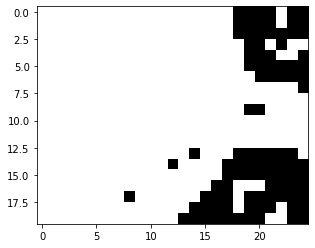

In [87]:
plt.imshow(gray[20:40,50:75],cmap='gray')

In [89]:
print(gray[20:40,50:75])

[[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0 20  0
   0]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0 20  0
   0]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0  0  0
   0]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0 20  0 20
  20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0  0 20 20
   0]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0  0
   0]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0
   0]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
   0]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
  20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  0  0 20 20 20
  20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
  20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
  20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20

In [151]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

im1=cv2.imread('../../7.jpg')
gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
gray = cv2.morphologyEx(gray, cv2.MORPH_DILATE, kernel)
gray = cv2.adaptiveThreshold(gray,20,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,0)
try:
    _, contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
except:
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
#plt.plot(contours[8].reshape(6,2))
print(contours[8])
A1 = cv2.contourArea(contours[8])
print(A1)

[[[139 129]]

 [[140 128]]

 [[141 128]]

 [[142 129]]

 [[141 130]]

 [[140 130]]]
4.0
